In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset_job_categories.csv")
df

,Title,Description,Company,worktype,ID,Date,Location,Link,Title-Category
0,['Manager - Penetration Testing - Cyber Securi...,"["" Manager - Penetration Testing - Cyber Secu...",[[]],[[]],NaN,NaN,NaN,NaN,technology
1,['Penetration Tester'],[' Penetration Tester - Sydney Central Busine...,[[]],[[]],NaN,NaN,NaN,NaN,pentester
2,['Penetration Testing Specialist'],"["" Penetration Testing Specialist - South Aus...",[[]],[['Full-time']],NaN,NaN,NaN,NaN,specialist
3,['Application Security Engineer/ Penetration t...,"["" Application Security Engineer/ Penetration...",[[]],[[]],NaN,NaN,NaN,NaN,engineer
4,['Penetration Tester'],"["" Penetration Tester - Brisbane QLD - Indeed...",[[]],[['Full-time']],NaN,NaN,NaN,NaN,pentester
...,...,...,...,...,...,...,...,...,...
493,['Junior Penetration Tester'],"["" Junior Penetration Tester - Charleston, SC...",[[]],[[]],NaN,NaN,NaN,NaN,junior
494,['Penetration Tester'],"["" Penetration Tester - Lafayette, CO 80026 -...",[[]],[[]],NaN,NaN,NaN,NaN,pentester
495,['Sr. Penetration Tester'],"["" Sr. Penetration Tester - Beaverton, OR 970...",[[]],[['Full-time']],NaN,NaN,NaN,NaN,senior
496,['Penetration Tester'],"["" Penetration Tester - Arlington, VA 22209 -...",[[]],[['Full-time']],NaN,NaN,NaN,NaN,pentester


In [3]:
languages = ['Java', 'Python', 'HTML', 'CSS', 'JavaScript', 'XML', 'jQuery', 'C#', 'JSON', 'Scala', 'ASP', '.NET', 'Objective C', 'Go', 'Rust', 'PHP', 'Ruby', 'Perl']


In [4]:
title_categories_list = ['pentester', 'specialist', 'engineer', 'lead', 'consultant', 'junior', 'security', 'web', 'senior', 'analyst', 'manager', 'red', 'vulnerability', 'technology', 'clearance', 'remote', 'team', 'secret', 'network']


In [5]:
data = {'Languages': languages}
new_df = pd.DataFrame(data=data)
new_df 

for category in title_categories_list: 
    temp_df = df.loc[df["Title-Category"] == category]
    languages_dict = {skill.lower():0 for skill in languages}
    for index, row in temp_df.iterrows():
        job_description = row["Description"]
        for key, value in languages_dict.items():
            if key in job_description.lower():
                languages_dict[key] += 1
#     print(languages_dict)
    count_column=[value for key,value in languages_dict.items()]
    new_df[category] = count_column

new_df


,Languages,pentester,specialist,engineer,lead,consultant,junior,security,web,senior,analyst,manager,red,vulnerability,technology,clearance,remote,team,secret,network
0,Java,60,1,3,2,8,2,6,4,6,2,0,3,1,1,0,3,0,32,1
1,Python,77,1,8,3,8,4,6,5,12,2,1,7,4,1,0,4,0,32,2
2,HTML,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,CSS,7,0,2,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,JavaScript,30,0,2,2,2,0,2,3,5,0,0,1,0,0,0,2,0,0,0
5,XML,2,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
6,jQuery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,C#,20,0,0,1,1,0,1,3,5,2,0,2,0,1,0,1,0,32,1
8,JSON,2,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0
9,Scala,15,1,5,0,0,1,0,0,8,0,2,0,0,1,0,0,0,0,1


In [6]:
# drop rows with zeros only
new_df = new_df.set_index('Languages')
new_df = new_df.loc[~new_df.apply(lambda row: (row==0).all(), axis=1)]
new_df

,pentester,specialist,engineer,lead,consultant,junior,security,web,senior,analyst,manager,red,vulnerability,technology,clearance,remote,team,secret,network
Languages,,,,,,,,,,,,,,,,,,,
Java,60,1,3,2,8,2,6,4,6,2,0,3,1,1,0,3,0,32,1
Python,77,1,8,3,8,4,6,5,12,2,1,7,4,1,0,4,0,32,2
HTML,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
CSS,7,0,2,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
JavaScript,30,0,2,2,2,0,2,3,5,0,0,1,0,0,0,2,0,0,0
XML,2,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
C#,20,0,0,1,1,0,1,3,5,2,0,2,0,1,0,1,0,32,1
JSON,2,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0
Scala,15,1,5,0,0,1,0,0,8,0,2,0,0,1,0,0,0,0,1


In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="white")
import itertools

/Users/pragyakaushik/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


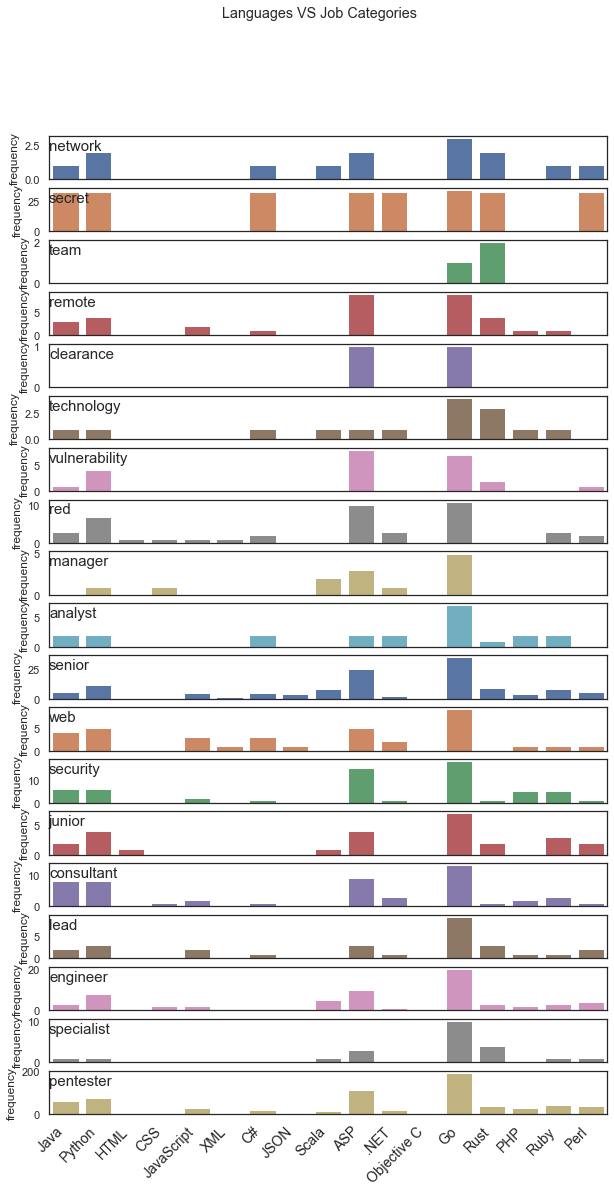

In [8]:
fig, axes = plt.subplots(19, 1, sharex=True, figsize=(10,18))
fig.suptitle('Languages VS Job Categories')

# set palette 
palette = itertools.cycle(sns.color_palette())

idx = 0
for item in title_categories_list[::-1]:
    c = next(palette)
    sns.barplot(ax=axes[idx], x=new_df.index, y=new_df[item], color=c)
    axes[idx].set_title(item, fontsize=15, loc='left',pad=-14)
    axes[idx].set(xlabel=None, ylabel='frequency') 
    if idx == 18:
        axes[idx].set_xticklabels(
            axes[idx].get_xticklabels(), 
            rotation=45, 
            horizontalalignment='right',
            fontweight='light',
            fontsize=14
        )
    idx+=1
